# 📓 EDA — Movilidad CDMX (2021–2025)

## 🎯 Objetivo del Proyecto
Analizar la movilidad de la Ciudad de México a través de la afluencia registrada en los principales sistemas de transporte público —**Metro, Metrobús, Trolebús, Cablebús y Tren Ligero**— con datos abiertos actualizados a 2025.  

El proyecto busca identificar **patrones de uso**, **tendencias temporales** y **diferencias entre líneas y estaciones**, así como evaluar el **impacto de los distintos tipos de pago**.  

Los resultados se presentarán en un **dashboard interactivo en Power BI**, con una página dedicada a cada sistema de transporte y una visión general comparativa. Además, se implementará un **chatbot en Power BI** que permita responder preguntas de negocio de manera dinámica, facilitando la exploración de los datos y el apoyo a la toma de decisiones en materia de movilidad urbana.


## 🔎 EDA Parte 1 — Exploración inicial

En esta primera parte se realiza:
- Revisión de estructura con `.info()`.
- Estadísticas descriptivas con `.describe()`.
- Conteo de valores nulos y duplicados.
- Exploración de variables categóricas (`linea`, `estacion`, `tipo_pago`).
- Primeras visualizaciones:
  - Histograma de `afluencia`.
  - Registros por año y sistema.


In [ ]:
# === Paso 2: Configuración e importación de librerías ===

import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA_DIR = Path("data")

# Verificamos que exista
assert DATA_DIR.exists(), f"No se encontró la carpeta {DATA_DIR}"
print("Ruta de datos:", DATA_DIR.resolve())


Ruta de datos: C:\Users\cammh\OneDrive\Escritorio\movilidad-cdmx-2021-2025\data


Se cargarán en un **diccionario de DataFrames** para poder explorarlos por separado

In [2]:
files = {
    "metro": "afluencia Metro.csv",
    "metrobus": "afluencia Metrobus.csv",
    "trolebus": "afluencia trolebus.csv",
    "cablebus": "afluencia cable bus.csv",
    "tren_ligero": "afluencia tren ligero.csv"
}

# Cargar todos en un diccionario de DataFrames
dfs = {}
for sistema, filename in files.items():
    path = DATA_DIR / filename
    dfs[sistema] = pd.read_csv(path)
    print(f"{sistema:10s} -> {dfs[sistema].shape[0]:,} filas x {dfs[sistema].shape[1]} columnas")

# Vista rápida del Metro
dfs["metro"].head()

metro      -> 978,705 filas x 7 columnas
metrobus   -> 23,422 filas x 8 columnas
trolebus   -> 44,901 filas x 8 columnas
cablebus   -> 5,232 filas x 8 columnas
tren_ligero -> 2,616 filas x 7 columnas


,fecha,mes,anio,linea,estacion,tipo_pago,afluencia
0,2021-01-01,Enero,2021,LÃ­nea 1,Balbuena,Boleto,1848
1,2021-01-01,Enero,2021,LÃ­nea 1,Balbuena,Prepago,790
2,2021-01-01,Enero,2021,LÃ­nea 1,Balbuena,Gratuidad,325
3,2021-01-01,Enero,2021,LÃ­nea 1,Balderas,Boleto,1103
4,2021-01-01,Enero,2021,LÃ­nea 1,Balderas,Prepago,922


## Estructura y vista rápida
Usamos `.info()` para ver tipos de dato y `.head()` para una muestra inicial de cada sistema.


In [6]:
for sistema, df in dfs.items():
    print(f"\n=== {sistema.upper()} ===")
    print(df.info())
    display(df.head(3))


=== METRO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978705 entries, 0 to 978704
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   fecha      978705 non-null  object
 1   mes        978705 non-null  object
 2   anio       978705 non-null  int64 
 3   linea      978705 non-null  object
 4   estacion   978705 non-null  object
 5   tipo_pago  978705 non-null  object
 6   afluencia  978705 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 52.3+ MB
None


,fecha,mes,anio,linea,estacion,tipo_pago,afluencia
0,2021-01-01,Enero,2021,LÃ­nea 1,Balbuena,Boleto,1848
1,2021-01-01,Enero,2021,LÃ­nea 1,Balbuena,Prepago,790
2,2021-01-01,Enero,2021,LÃ­nea 1,Balbuena,Gratuidad,325



=== METROBUS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23422 entries, 0 to 23421
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fecha           23422 non-null  object 
 1   mes             23422 non-null  object 
 2   anio            23422 non-null  int64  
 3   linea           23422 non-null  object 
 4   tipo_pago       23422 non-null  object 
 5   afluencia       23422 non-null  float64
 6   temporal_fecha  23422 non-null  object 
 7   ..anio_fecha    23422 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB
None


,fecha,mes,anio,linea,tipo_pago,afluencia,temporal_fecha,..anio_fecha
0,2021-01-01,Enero,2021,Línea 1,Prepago,39122.0,2021-01,2021
1,2021-01-01,Enero,2021,Línea 1,Gratuidad,3528.0,2021-01,2021
2,2021-01-01,Enero,2021,Línea 2,Prepago,23669.0,2021-01,2021



=== TROLEBUS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44901 entries, 0 to 44900
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   fecha           44901 non-null  object
 1   mes             44901 non-null  object
 2   anio            44901 non-null  int64 
 3   linea           44901 non-null  object
 4   tipo_pago       44901 non-null  object
 5   afluencia       44901 non-null  int64 
 6   temporal_fecha  44901 non-null  object
 7   ..anio_fecha    44901 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 2.7+ MB
None


,fecha,mes,anio,linea,tipo_pago,afluencia,temporal_fecha,..anio_fecha
0,2022-01-01,Enero,2022,Línea 1,Boleto,16826,2022-01,2022
1,2022-01-01,Enero,2022,Línea 1,Prepago,5062,2022-01,2022
2,2022-01-01,Enero,2022,Línea 1,Gratuidad,9111,2022-01,2022



=== CABLEBUS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5232 entries, 0 to 5231
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   fecha           5232 non-null   object
 1   mes             5232 non-null   object
 2   anio            5232 non-null   int64 
 3   linea           5232 non-null   object
 4   tipo_pago       5232 non-null   object
 5   afluencia       5232 non-null   int64 
 6   temporal_fecha  5232 non-null   object
 7   ..anio_fecha    5232 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 327.1+ KB
None


,fecha,mes,anio,linea,tipo_pago,afluencia,temporal_fecha,..anio_fecha
0,2022-01-01,Enero,2022,Línea 1,Prepago,24975,2022-01,2022
1,2022-01-01,Enero,2022,Línea 1,Gratuidad,2175,2022-01,2022
2,2022-01-01,Enero,2022,Línea 2,Prepago,42050,2022-01,2022



=== TREN_LIGERO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616 entries, 0 to 2615
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fecha           2616 non-null   object 
 1   mes             2616 non-null   object 
 2   anio            2616 non-null   int64  
 3   tipo_pago       2616 non-null   object 
 4   afluencia       2616 non-null   float64
 5   temporal_fecha  2616 non-null   object 
 6   ..anio_fecha    2616 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 143.2+ KB
None


,fecha,mes,anio,tipo_pago,afluencia,temporal_fecha,..anio_fecha
0,2022-01-01,Enero,2022,Prepago,14251.0,2022-01,2022
1,2022-01-01,Enero,2022,Gratuidad,1806.0,2022-01,2022
2,2022-01-02,Enero,2022,Prepago,21875.0,2022-01,2022


## Valores nulos y duplicados
Conteo total de nulos por dataset y número de filas completamente duplicadas.

In [8]:
print("\n--- Valores nulos por dataset ---")
for sistema, df in dfs.items():
    total_nulos = df.isna().sum().sum()
    print(f"{sistema:10s} -> {total_nulos} nulos en total")

print("\n--- Registros duplicados por dataset ---")
for sistema, df in dfs.items():
    dups = df.duplicated().sum()
    print(f"{sistema:10s} -> {dups} duplicados")



--- Valores nulos por dataset ---
metro      -> 0 nulos en total
metrobus   -> 0 nulos en total
trolebus   -> 0 nulos en total
cablebus   -> 0 nulos en total
tren_ligero -> 0 nulos en total

--- Registros duplicados por dataset ---
metro      -> 0 duplicados
metrobus   -> 0 duplicados
trolebus   -> 0 duplicados
cablebus   -> 0 duplicados
tren_ligero -> 0 duplicados


## Variables categóricas
Revisamos cardinalidad de `linea`, `estacion` y categorías presentes en `tipo_pago`.


In [9]:
for sistema, df in dfs.items():
    print(f"\n{sistema.upper()} — Categorías")
    if "linea" in df.columns:
        print(" Líneas:", df["linea"].nunique())
        print(" Top 10 líneas:", df["linea"].value_counts().head(10).to_dict())
    if "estacion" in df.columns:
        print(" Estaciones:", df["estacion"].nunique())
        print(" Top 10 estaciones:", df["estacion"].value_counts().head(10).to_dict())
    if "tipo_pago" in df.columns:
        print(" Tipos de pago:", df["tipo_pago"].dropna().unique())



METRO — Categorías
 Líneas: 24
 Top 10 líneas: {'LÃ\xadnea 2': 63432, 'Linea 2': 57024, 'LÃ\xadnea B': 55503, 'LÃ\xadnea 3': 55503, 'LÃ\xadnea 12': 52860, 'LÃ\xadnea 1': 52860, 'LÃ\xadnea 8': 50217, 'Linea 3': 49896, 'Linea B': 49896, 'Linea 1': 47520}
 Estaciones: 168
 Top 10 estaciones: {'PantitlÃ¡n': 20076, 'Tacubaya': 15057, 'Chabacano': 15057, 'Balderas': 10038, 'Pino SuÃ¡rez': 10038, 'Salto del Agua': 10038, 'Atlalilco': 10038, 'Candelaria': 10038, 'Zapata': 10038, 'Ermita': 10038}
 Tipos de pago: ['Boleto' 'Prepago' 'Gratuidad']

METROBUS — Categorías
 Líneas: 14
 Top 10 líneas: {'Línea 1': 2616, 'Línea 2': 2616, 'Línea 3': 2616, 'Línea 4': 2616, 'Línea 5': 2616, 'Línea 6': 2616, 'Línea 7': 2616, 'linea 1': 730, 'linea 2': 730, 'linea 3': 730}
 Tipos de pago: ['Prepago' 'Gratuidad']

TROLEBUS — Categorías
 Líneas: 26
 Top 10 líneas: {'Línea 1': 3831, 'Línea 1 Nochebús': 3831, 'Línea 2': 3831, 'Línea 3': 3831, 'Línea 4': 3831, 'Línea 5': 3831, 'Línea 6': 3831, 'Línea 7': 3831, '

## Histogramas de afluencia por sistema
Visualizamos la distribución de `afluencia` para detectar sesgos, outliers y escalas distintas.

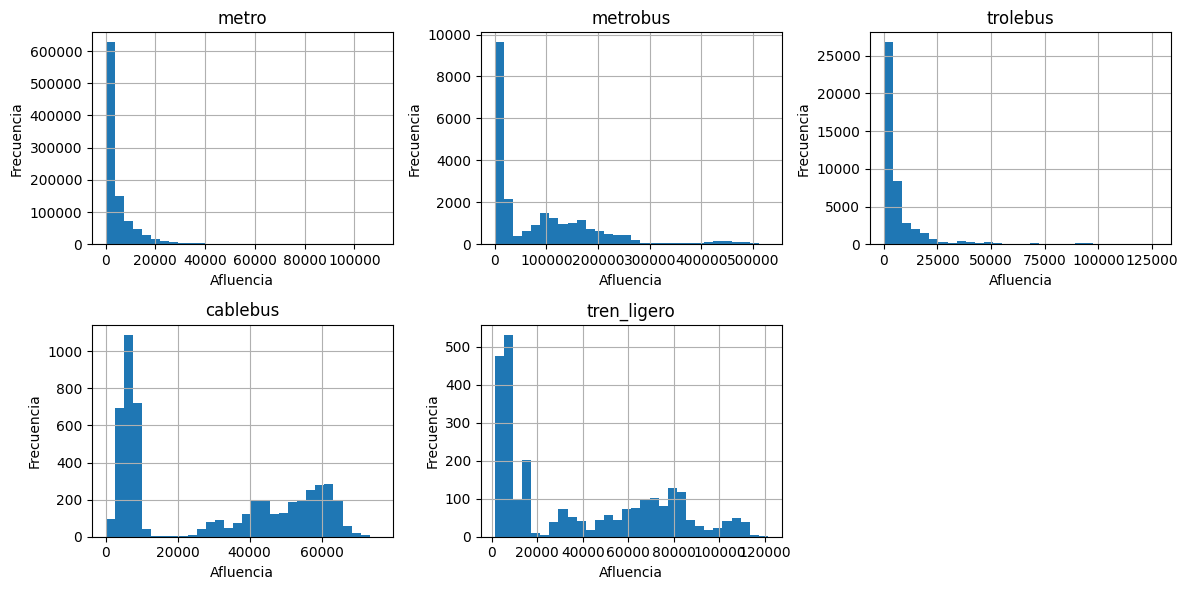

In [12]:
plt.figure(figsize=(12,6))
for i, (sistema, df) in enumerate(dfs.items(), 1):
    plt.subplot(2, 3, i)
    df["afluencia"].hist(bins=30)
    plt.title(sistema)
    plt.xlabel("Afluencia")
    plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

## Registros por año y por sistema
Graficamos cuántos registros hay por año en cada sistema para confirmar coberturas temporales.


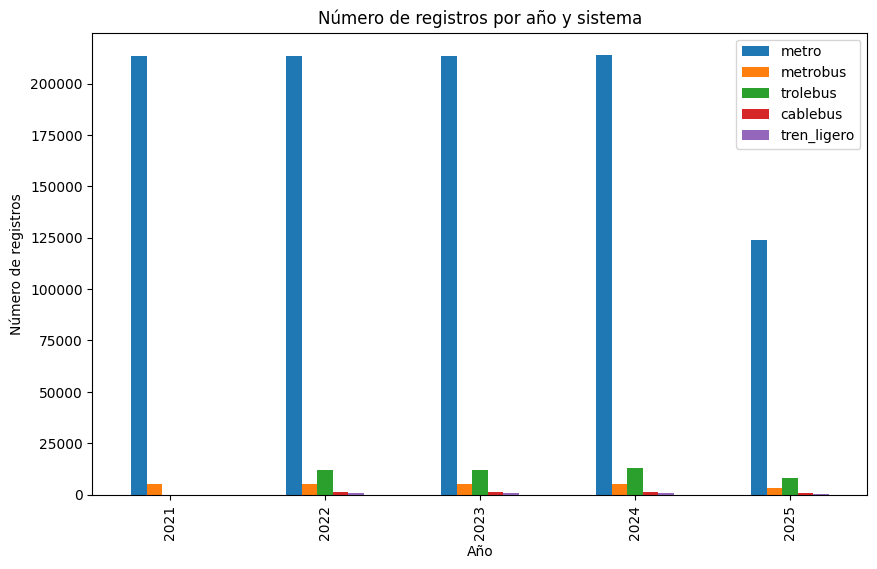

In [11]:
anios = {s: df["anio"].value_counts().sort_index() for s, df in dfs.items()}
anios_df = pd.DataFrame(anios).fillna(0).astype(int)

ax = anios_df.plot(kind="bar", figsize=(10,6))
ax.set_title("Número de registros por año y sistema")
ax.set_xlabel("Año")
ax.set_ylabel("Número de registros")
plt.show()


##  Observaciones — EDA Parte 1

1. **Estructura de datos**
   - Todos los datasets cargaron correctamente sin valores nulos ni duplicados.  
   - Algunos sistemas incluyen columnas adicionales (`temporal_fecha`, `_anio_fecha`) que después podremos estandarizar o descartar.  
   - Tipos de datos: `fecha` todavía está como `object` en todos los casos, será necesario convertirla a `datetime`.

2. **Cobertura temporal**
   - **Metro y Metrobús** tienen datos desde **2021 hasta 2025**.  
   - **Cablebús, Trolebús y Tren Ligero** comienzan en **2022**.  
   - Esto confirma diferencias de inicio de registros por sistema.

3. **Categorías**
   - **Metro** es el más detallado: 24 líneas y 168 estaciones.  
   - Los demás solo incluyen línea (Metrobús 6, Trolebús 6, Cablebús 2, Tren Ligero 1).  
   - En todos aparece la variable `tipo_pago`, con categorías **Prepago** y **Gratuidad**, además de **Boleto** en Metro/Trolebús.

4. **Distribución de afluencia**
   - En todos los sistemas la distribución es **altamente sesgada** hacia valores bajos, con algunos **outliers muy grandes** (ej. Metro y Metrobús).  
   - El Metro concentra la mayor cantidad de registros y usuarios, lo que se refleja en histogramas más cargados.

5. **Registros por año**
   - El Metro domina en volumen de registros.  
   - Cablebús, Trolebús y Tren Ligero tienen muy pocos registros en comparación, lo que puede impactar el análisis comparativo.  
   - La cobertura de años es consistente con lo esperado: Metro/Metrobús desde 2021 y el resto desde 2022.
